# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [2]:
# Visualizando os dados no DataFrame
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


#### a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [3]:
# Criando a média e a diferença
df['media'] = 0.5 * df['p1'] + 0.5 * df['p2']
df['diferenca'] = -1 * df['p1'] + 1 * df['p2']

In [4]:
# Visualizando DataFrame
df.head()

,p1,p2,media,diferenca
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


In [5]:
# Armazenando o valor máximo da média arredondado para cima + 1
maximo = df['media'].max()
valor_max = math.ceil(maximo) + 1

In [6]:
# Criando a função para a transformação linear
def transf_lin(m, valor_max):

    #Definindo figura e configurando eixos
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -valor_max
    xmax = valor_max
    ymin = -valor_max
    ymax = valor_max

    # ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    # Vetores coluna da matriz de transformação
    ax.arrow(0, 0, m[0,0], m[1,0]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[0,1], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)


    #linhas horizontais e verticais de referência
    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    #Transformação linear
    df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

    # Plotar os dados originais
    plt.scatter(df['p1'], df['p2'], label='originais')

    # Plotar os dados transformados
    plt.scatter(df_rot[0,:], df_rot[1,:], label='rotação')

    #Legenda
    plt.legend(loc='lower right')

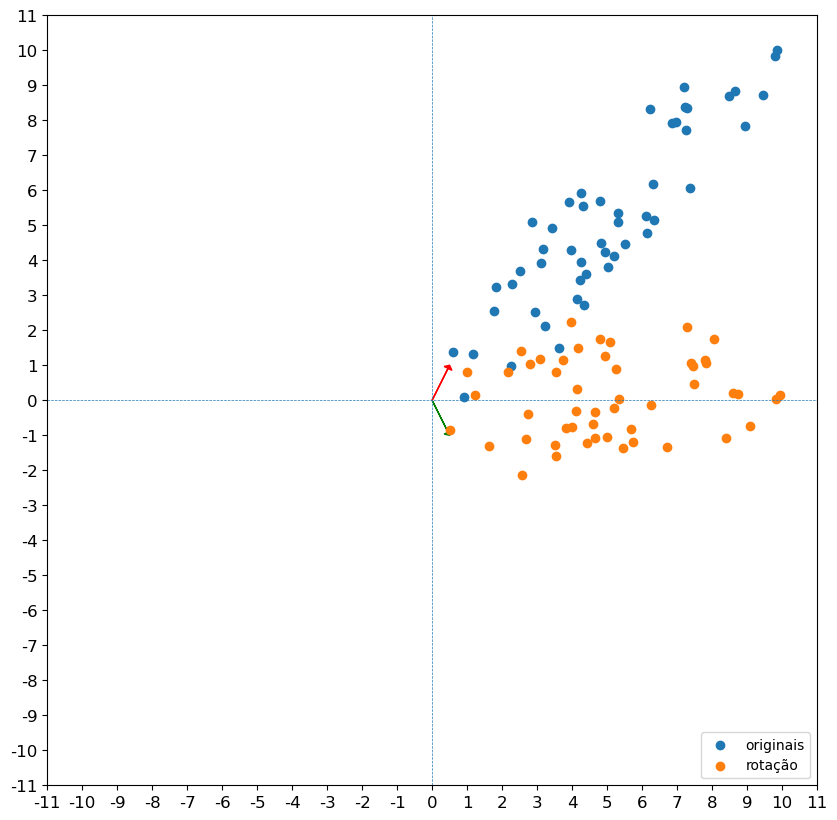

In [8]:
# Criando a visualização gráfica
t = np.array([[ .5, .5],
              [ -1, 1]])
transf_lin(t, valor_max)

#### b) Calcule a correlação entre os dados da p1 e p2

In [9]:
Corr_p1_p2 = df[['p1', 'p2']].corr()
Corr_p1_p2

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


#### c) Calcule a correlação entre os dados transformados (média e diferença)

In [10]:
Corr_med_dif = df[['media', 'diferenca']].corr()
Corr_med_dif

,media,diferenca
media,1.000000,0.133474
diferenca,0.133474,1.000000


#### d) Comente as correlações observadas.

Os dados **p1** e **p2** apresentação forte correção, situação que pode ser observada no gráfico, pois a medida que **p1** cresce, **p2** também cresce. Já para a **média** e a **diferença**, a correção é baixa conforme também pode ser visualizada no gráfico.  

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [11]:
# Criando a soma
df['soma'] = 1 * df['p1'] + 1 * df['p2']

In [12]:
# Visualizando DataFrame
df.head()

,p1,p2,media,diferenca,soma
0,6.964692,7.943428,7.454060,0.978736,14.908120
1,2.861393,5.099537,3.980465,2.238143,7.960930
2,2.268515,0.974429,1.621472,-1.294085,3.242944
3,5.513148,4.474359,4.993754,-1.038788,9.987507
4,7.194690,8.938402,8.066546,1.743712,16.133092


In [13]:
# Armazenando o valor máximo da soma arredondado para cima + 1
maximo = df['soma'].max()
valor_max = math.ceil(maximo) + 1

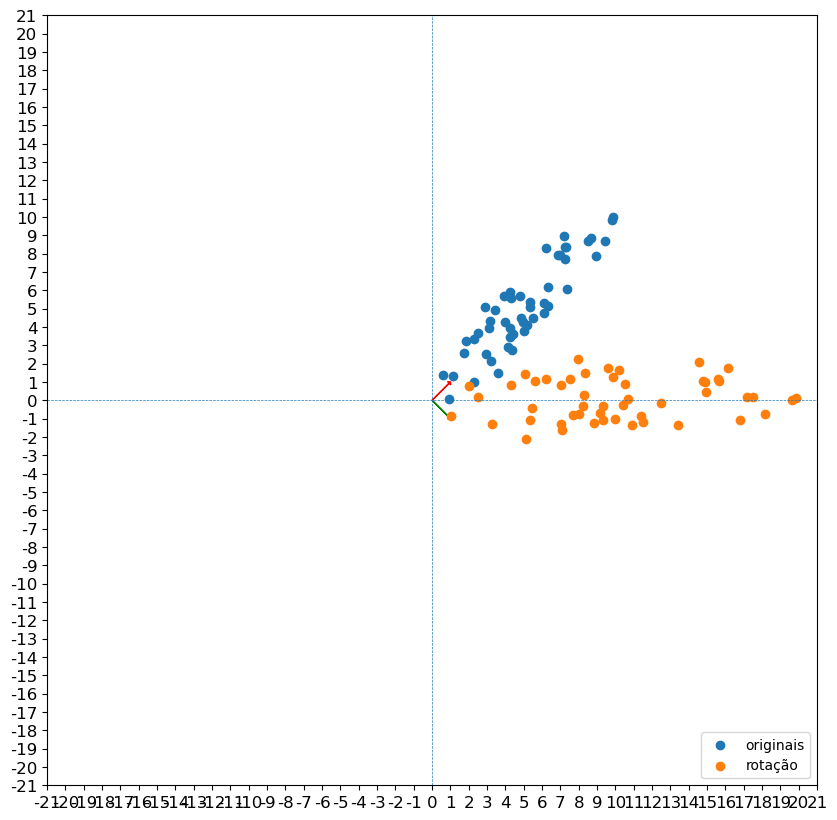

In [14]:
# Criando a visualização gráfica
t = np.array([[ 1, 1],
              [ -1, 1]])
transf_lin(t, valor_max)

In [15]:
# Calculando a correlação entre os dados transformados (soma e diferença)
Corr_som_dif = df[['soma', 'diferenca']].corr()
Corr_som_dif

,soma,diferenca
soma,1.000000,0.133474
diferenca,0.133474,1.000000


**Conclusão:**
A **média** e a **soma** estão co-lineares, ou seja, é como se tivessemos dando uma esticada, tendo em vista que a **soma** representa 2 (duas) vezes a **média**. Sendo assim não há mudança com relação a análise de correlação, conforme visualização gráfica.